In [ ]:
# ML Project
# Group 15 
# Akshat Saini - 2020019
# Nakul Thureja - 2020528
# Nishaant Rastogi - 2020091

In [ ]:
! pip install wfdb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 6.3 MB/s eta 0:00:00


In [ ]:
# from google.colab import drive
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wfdb
from pathlib import Path
import pickle
import os
import requests
import zipfile
import gzip
import ast
import time
import numpy as np
import wfdb
import ast
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import mpl
from scipy.fftpack import fft, ifft 
from scipy import signal
import os
import pickle
from keras.models import Model, Sequential
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras import layers, optimizers, losses, metrics, regularizers, callbacks

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
sampling_rate = 100


In [ ]:
X_train = pickle.load(open('/content/drive/MyDrive/PTB-XL/X_train_pca.pkl', 'rb'))
y_train = pickle.load(open('/content/drive/MyDrive/PTB-XL/y_train_pca.pkl', 'rb'))
X_test = pickle.load(open('/content/drive/MyDrive/PTB-XL/X_test_pca.pkl', 'rb'))
y_test = pickle.load(open('/content/drive/MyDrive/PTB-XL/y_test_pca.pkl', 'rb'))

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train = imp.fit_transform(X_train) # X_imp is the input data with no missing values
X_test = imp.transform(X_test)

In [ ]:
X_train.shape, y_train.shape

((40965, 240), (40965,))

In [ ]:
X_test.shape, y_test.shape

((4361, 240), (4361,))

In [ ]:
X_res,y_res = X_train, y_train

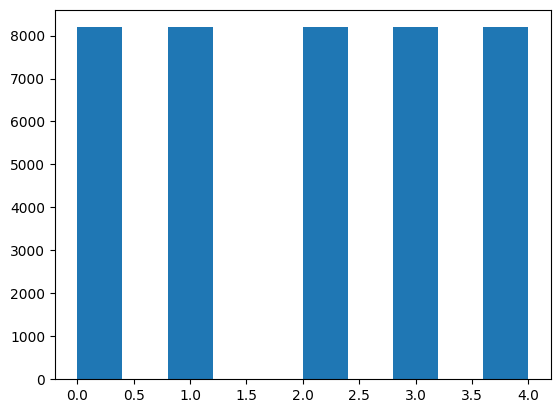

In [ ]:
plt.hist(y_res)
plt.show()

###Models

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score

In [ ]:
# XGBoost Classifier
from xgboost import XGBClassifier


for train_class in range(5):
    print("----training classifier for %s----"%(train_class))
    y_train_class = (y_res == train_class)
    y_test_class = (y_test == train_class)
    
    xgb = XGBClassifier()

    xgb.fit(X_res, y_train_class)
    xgb_y_predict = xgb.predict(X_test)
    xgb_y_predict_train = xgb.predict(X_res)
    
    xgb_score1 = accuracy_score(xgb_y_predict_train, y_train_class)
    xgb_score = accuracy_score(xgb_y_predict, y_test_class)
    y_prob = xgb.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test_class, y_prob)

    print("Train Accuracy: %.3f" % xgb_score1)
    print("Test Accuracy: %.3f" % xgb_score)
    print(f"ROC AUC Score: {roc_auc:.2f}")
    print("precision: %.3f" % precision_score(y_test_class, xgb_y_predict))
    print("recall: %.3f" % recall_score(y_test_class, xgb_y_predict))
    print("f1-score: %.3f" % f1_score(y_test_class, xgb_y_predict))
    pickle.dump(xgb,open('/content/drive/MyDrive/Models_Rhythm/xgb'+str(train_class)+".pkl", 'wb'))


----training classifier for 0----
Train Accuracy: 0.927
Test Accuracy: 0.486
ROC AUC Score: 0.43
precision: 0.349
recall: 0.104
f1-score: 0.160
----training classifier for 1----
Train Accuracy: 0.941
Test Accuracy: 0.850
ROC AUC Score: 0.52
precision: 0.085
recall: 0.006
f1-score: 0.012
----training classifier for 2----
Train Accuracy: 0.934
Test Accuracy: 0.887
ROC AUC Score: 0.50
precision: 0.030
recall: 0.002
f1-score: 0.004
----training classifier for 3----
Train Accuracy: 0.933
Test Accuracy: 0.789
ROC AUC Score: 0.45
precision: 0.178
recall: 0.019
f1-score: 0.034
----training classifier for 4----
Train Accuracy: 0.942
Test Accuracy: 0.914
ROC AUC Score: 0.43
precision: 0.077
recall: 0.003
f1-score: 0.005


In [ ]:
from sklearn.svm import SVC

for train_class in range(0,5):
    print("----training classifier for %s----"%([train_class]))
    y_train_x = (y_res == train_class)
    y_test_x = (y_test == train_class)
    svm = SVC(kernel='rbf')    
    svm.fit(X_res, y_train_x)
    svm_y_predict = svm.predict(X_test)
    svm_y_predict_train = svm.predict(X_res)

    svm_score1 = accuracy_score(svm_y_predict_train, y_res)
    svm_score = accuracy_score(svm_y_predict, y_test_x)
    y_scores = svm.decision_function(X_test)
    roc_auc = roc_auc_score(y_test_x, y_scores) 


    print("Train Accuracy: %.3f" % svm_score1)
    print("Test Accuracy: %.3f" % svm_score)
    print(f"ROC AUC Score: {roc_auc:.2f}")
    print("precision: %.3f" % precision_score(y_test_class, svm_y_predict))
    print("recall: %.3f" % recall_score(y_test_class, svm_y_predict))
    print("f1-score: %.3f" % f1_score(y_test_class, svm_y_predict))
    pickle.dump(svm,open('/content/drive/MyDrive/Models_Rhythm/svm'+str(train_class)+".pkl", 'wb'))


----training classifier for [0]----
Train Accuracy: 0.151
Test Accuracy: 0.528
ROC AUC Score: 0.43
precision: 0.000
recall: 0.000
f1-score: 0.000
----training classifier for [1]----
Train Accuracy: 0.261
Test Accuracy: 0.859
ROC AUC Score: 0.44
precision: 0.000
recall: 0.000
f1-score: 0.000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


----training classifier for [2]----
Train Accuracy: 0.200
Test Accuracy: 0.894
ROC AUC Score: 0.49
precision: 0.000
recall: 0.000
f1-score: 0.000
----training classifier for [3]----


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Accuracy: 0.200
Test Accuracy: 0.803
ROC AUC Score: 0.60
precision: 0.000
recall: 0.000
f1-score: 0.000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


----training classifier for [4]----
Train Accuracy: 0.200
Test Accuracy: 0.916
ROC AUC Score: 0.53
precision: 0.000
recall: 0.000
f1-score: 0.000


In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict


for train_class in range(5):
    print("----training classifier for %s----"%([train_class]))
    y_train_x = (y_res == train_class)
    y_test_x = (y_test == train_class)
    
    forest_clf = RandomForestClassifier(random_state=0)
    forest_clf.fit(X_res, y_train_x)
    
    forest_y_predict = forest_clf.predict(X_test)
    forest_y_predict_train = forest_clf.predict(X_res)
    forest_score1 = accuracy_score(forest_y_predict_train, y_train_x)
    forest_score = accuracy_score(forest_y_predict, y_test_x)
   
    y_probas_forest = cross_val_predict(forest_clf, X_test, y_test_x, cv=5 ,method="predict_proba")    
    y_scores_forest = y_probas_forest[:, 1]
    y_train_pred = (y_scores_forest>=0.5)
    y_test_pred = forest_clf.predict(X_test)

    print("Train Accuracy: %.3f" % accuracy_score(forest_y_predict_train,y_train_x))
    print("Test Accuracy: %.3f" % accuracy_score(forest_y_predict,y_test_x))
    print("precision: %.3f" % precision_score(y_test_x, y_test_pred))
    print("recall: %.3f" % recall_score(y_test_x, y_test_pred))
    print("f1-score: %.3f" % f1_score(y_test_x, y_test_pred))
    print("roc score: %.3f" % roc_auc_score(y_test_x, y_scores_forest))
    pickle.dump(forest_clf,open('/content/drive/MyDrive/Models_Rhythm/forest'+str(train_class)+".pkl", 'wb'))


----training classifier for [0]----
Train Accuracy: 0.944
Test Accuracy: 0.473
precision: 0.206
recall: 0.041
f1-score: 0.068
roc score: 0.742
----training classifier for [1]----
Train Accuracy: 0.945
Test Accuracy: 0.858
precision: 0.000
recall: 0.000
f1-score: 0.000
roc score: 0.553
----training classifier for [2]----
Train Accuracy: 0.938
Test Accuracy: 0.894
precision: 0.000
recall: 0.000
f1-score: 0.000
roc score: 0.550
----training classifier for [3]----


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Accuracy: 0.940
Test Accuracy: 0.803
precision: 0.636
recall: 0.008
f1-score: 0.016
roc score: 0.729
----training classifier for [4]----
Train Accuracy: 0.943
Test Accuracy: 0.916
precision: 0.000
recall: 0.000
f1-score: 0.000
roc score: 0.717


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 9.1 MB/s eta 0:00:00


----training classifier for 0----
Train Accuracy: 0.200
Test Accuracy: 0.472
ROC AUC Score: 0.39
precision: 0.472
recall: 1.000
f1-score: 0.641


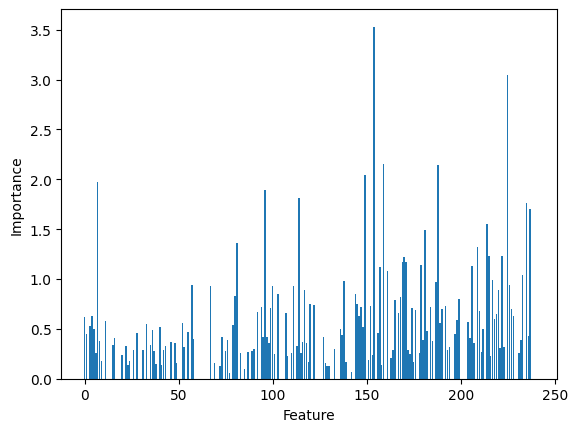

----training classifier for 1----
Train Accuracy: 0.200
Test Accuracy: 0.141
ROC AUC Score: 0.52
precision: 0.141
recall: 1.000
f1-score: 0.248


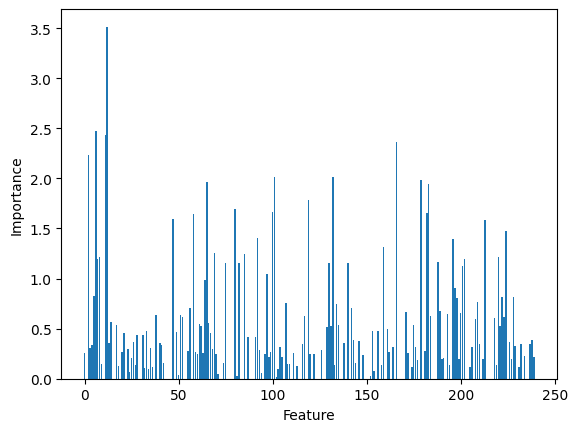

----training classifier for 2----
Train Accuracy: 0.200
Test Accuracy: 0.106
ROC AUC Score: 0.50
precision: 0.106
recall: 1.000
f1-score: 0.191


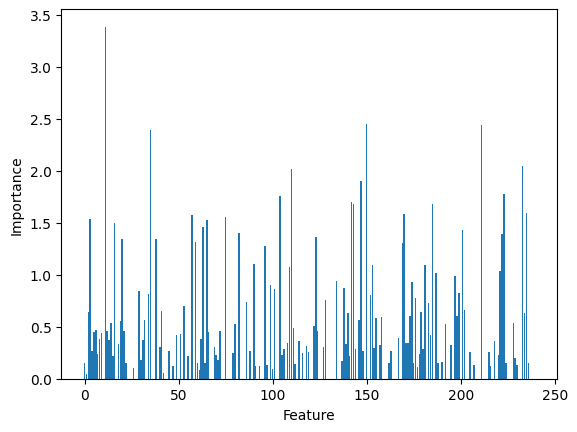

----training classifier for 3----
Train Accuracy: 0.200
Test Accuracy: 0.197
ROC AUC Score: 0.50
precision: 0.197
recall: 1.000
f1-score: 0.329


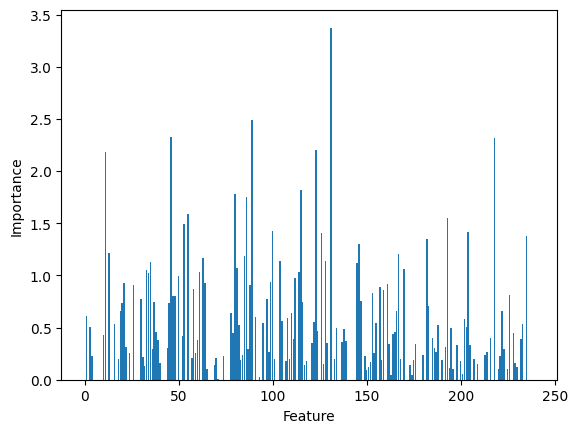

----training classifier for 4----
Train Accuracy: 0.200
Test Accuracy: 0.084
ROC AUC Score: 0.40
precision: 0.084
recall: 1.000
f1-score: 0.155


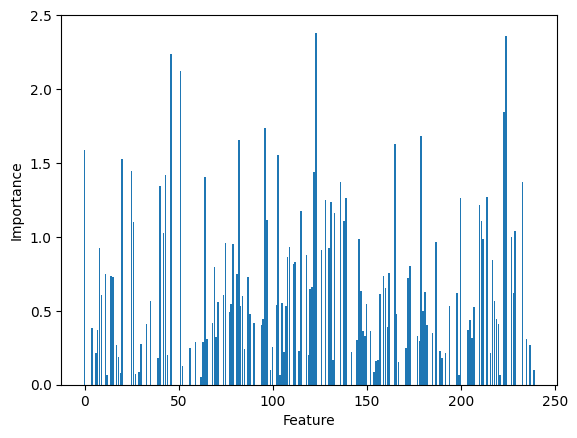

In [ ]:
# CatBoost Classifier 
from catboost import CatBoostClassifier, Pool

params = {
    "iterations": 100,
    "learning_rate": 0.1,
    "depth": 3,
    "loss_function": "Logloss",
    "verbose": False
}

for train_class in range(5):
    print("----training classifier for %s----"%(train_class))
    y_train_class = (y_res == train_class)
    y_test_class = (y_test == train_class)
    
    cat = CatBoostClassifier(**params)

    cat.fit(X_res, y_train_class)
    cat_y_predict = cat.predict(X_test)
    cat_y_predict_train = cat.predict(X_res)
    
    cat_y_predict = cat_y_predict.astype(bool)
    cat_y_predict_train = cat_y_predict_train.astype(bool)

    cat_score1 = accuracy_score(cat_y_predict_train, y_train_class)
    cat_score = accuracy_score(cat_y_predict, y_test_class)
    y_prob = cat.predict_proba(X_test)[:, 1]
    
    roc_auc = roc_auc_score(y_test_class, y_prob)

    print("Train Accuracy: %.3f" % cat_score1)
    print("Test Accuracy: %.3f" % cat_score)
    print(f"ROC AUC Score: {roc_auc:.2f}")
    print("precision: %.3f" % precision_score(y_test_class, cat_y_predict))
    print("recall: %.3f" % recall_score(y_test_class, cat_y_predict))
    print("f1-score: %.3f" % f1_score(y_test_class, cat_y_predict))

    # Get the feature importance values
    feature_importance = cat.get_feature_importance()

    # Plot the feature importance values as a bar chart
    plt.bar(range(len(feature_importance)), feature_importance)
    plt.xlabel("Feature")
    plt.ylabel("Importance")
    plt.show()
    pickle.dump(cat,open('/content/drive/MyDrive/Models_Rhythm/cat'+str(train_class)+".pkl", 'wb'))


In [ ]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


----training classifier for 0----
Train Accuracy: 0.853
Test Accuracy: 0.501
ROC AUC Score: 0.41
precision: 0.259
recall: 0.031
f1-score: 0.055


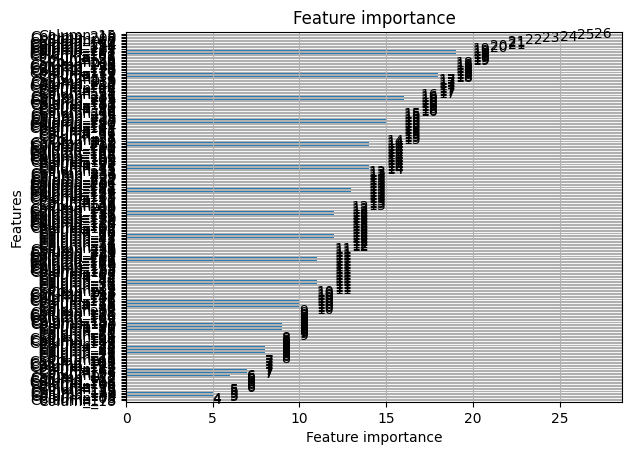

----training classifier for 1----
Train Accuracy: 0.867
Test Accuracy: 0.858
ROC AUC Score: 0.52
precision: 0.000
recall: 0.000
f1-score: 0.000


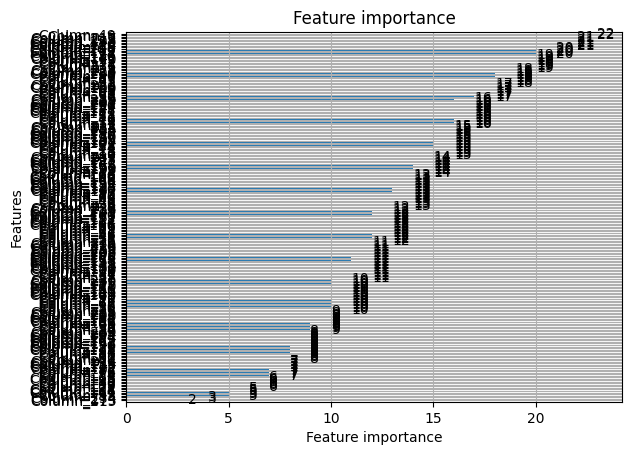

----training classifier for 2----
Train Accuracy: 0.869
Test Accuracy: 0.894
ROC AUC Score: 0.50
precision: 0.000
recall: 0.000
f1-score: 0.000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


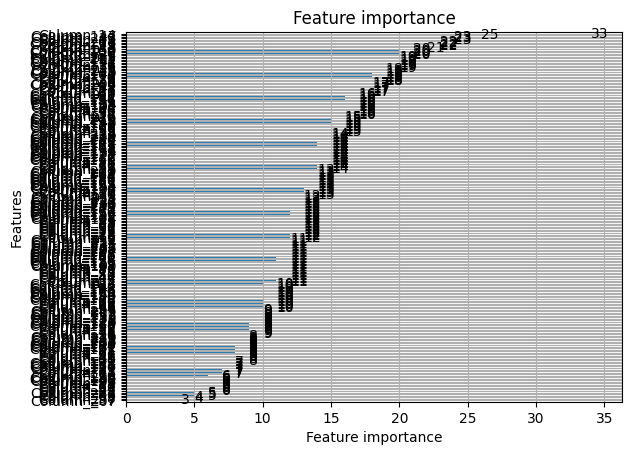

----training classifier for 3----
Train Accuracy: 0.846
Test Accuracy: 0.803
ROC AUC Score: 0.49
precision: 0.400
recall: 0.002
f1-score: 0.005


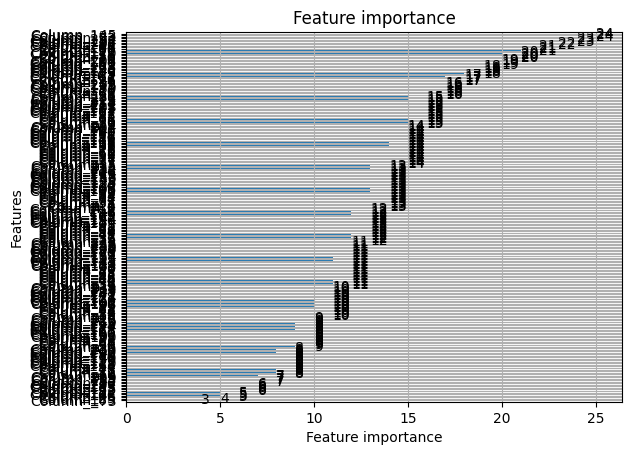

----training classifier for 4----
Train Accuracy: 0.888
Test Accuracy: 0.916
ROC AUC Score: 0.45
precision: 0.000
recall: 0.000
f1-score: 0.000


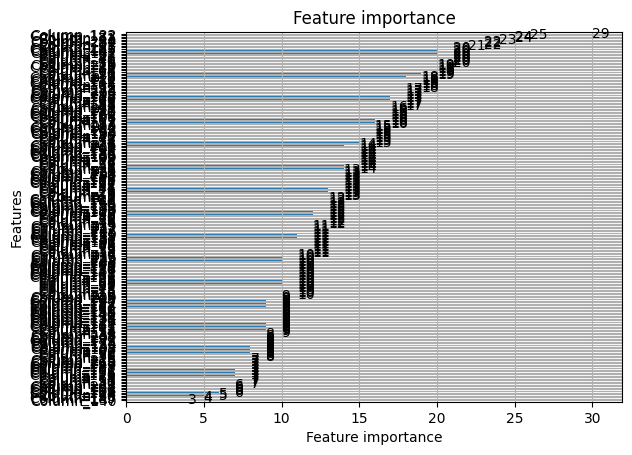

In [ ]:
# lgbmcBoost Classifier 
from lightgbm import LGBMClassifier
from lightgbm import plot_importance

params = {
    "n_estimators": 100,
    "learning_rate": 0.1,
    "num_leaves": 31,
    "verbose": -1
}


for train_class in range(5):
    print("----training classifier for %s----"%(train_class))
    y_train_class = (y_res == train_class)
    y_test_class = (y_test == train_class)
    
    lgbmc = LGBMClassifier(**params)

    lgbmc.fit(X_res, y_train_class)
    lgbmc_y_predict = lgbmc.predict(X_test)
    lgbmc_y_predict_train = lgbmc.predict(X_res)
    
    lgbmc_y_predict = lgbmc_y_predict.astype(bool)
    lgbmc_y_predict_train = lgbmc_y_predict_train.astype(bool)

    lgbmc_score1 = accuracy_score(lgbmc_y_predict_train, y_train_class)
    lgbmc_score = accuracy_score(lgbmc_y_predict, y_test_class)
    y_prob = lgbmc.predict_proba(X_test)[:, 1]
    
    roc_auc = roc_auc_score(y_test_class, y_prob)

    print("Train Accuracy: %.3f" % lgbmc_score1)
    print("Test Accuracy: %.3f" % lgbmc_score)
    print(f"ROC AUC Score: {roc_auc:.2f}")
    print("precision: %.3f" % precision_score(y_test_class, lgbmc_y_predict))
    print("recall: %.3f" % recall_score(y_test_class, lgbmc_y_predict))
    print("f1-score: %.3f" % f1_score(y_test_class, lgbmc_y_predict))
    plot_importance(lgbmc)
    plt.show()
    pickle.dump(lgbmc,open('/content/drive/MyDrive/Models_Rhythm/lgbmc'+str(train_class)+".pkl", 'wb'))
